### Importing all relevant data libraries and stock data from Yahoo Finance

In [236]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [237]:
#Input the stock name
stock = ['AAPL']

In [238]:
#Import data from Yahoo finance
ohlcv_df = yf.download(stock,'2020-01-01','2022-01-01')

display(ohlcv_df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.039879,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.683571,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.967216,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.548645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.202728,108872000
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.553543,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551147,79144300


In [239]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["Close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns
Date,,
2020-01-02,75.087502,0.022816
2020-01-03,74.357498,-0.009722
2020-01-06,74.949997,0.007968
2020-01-07,74.597504,-0.004703
2020-01-08,75.797501,0.016086


,Close,Actual Returns
Date,,
2021-12-23,176.279999,0.003644
2021-12-27,180.330002,0.022975
2021-12-28,179.289993,-0.005767
2021-12-29,179.380005,0.000502
2021-12-30,178.199997,-0.006578


### Generating the trading signals using short and long window SMA's

In [289]:
# Setting the short and long window

short_window = 2
long_window = 50

#Generate the fast and slow SMA's (5 and 20 days respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

#Dropping null values from start of dataframe
signals_df = signals_df.dropna()

#Review Dataframe
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2020-04-29,71.932503,0.032845,70.788750,67.914200,1.0,-0.032845
2020-04-30,73.449997,0.021096,72.691250,67.765099,1.0,0.021096
2020-05-01,72.267502,-0.016099,72.858749,67.608950,-1.0,-0.016099
2020-05-04,73.290001,0.014149,72.778751,67.509500,1.0,-0.014149
2020-05-05,74.389999,0.015009,73.840000,67.506400,1.0,0.015009


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-23,176.279999,0.003644,175.959999,158.865601,1.0,0.003644
2021-12-27,180.330002,0.022975,178.305000,159.597001,1.0,0.022975
2021-12-28,179.289993,-0.005767,179.809998,160.286001,-1.0,-0.005767
2021-12-29,179.380005,0.000502,179.334999,160.942601,1.0,-0.000502
2021-12-30,178.199997,-0.006578,178.790001,161.531401,-1.0,-0.006578


In [290]:
#Generate the new Signal column
signals_df['Signal'] = 0.0

#Generate long Buy signal when actual reutrns are greater than or equal to 0
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

#Generate Short Sell signal when Actual Returns are less than 0 
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2020-04-29,71.932503,0.032845,70.788750,67.914200,1.0,-0.032845
2020-04-30,73.449997,0.021096,72.691250,67.765099,1.0,0.021096
2020-05-01,72.267502,-0.016099,72.858749,67.608950,-1.0,-0.016099
2020-05-04,73.290001,0.014149,72.778751,67.509500,1.0,-0.014149
2020-05-05,74.389999,0.015009,73.840000,67.506400,1.0,0.015009


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-23,176.279999,0.003644,175.959999,158.865601,1.0,0.003644
2021-12-27,180.330002,0.022975,178.305000,159.597001,1.0,0.022975
2021-12-28,179.289993,-0.005767,179.809998,160.286001,-1.0,-0.005767
2021-12-29,179.380005,0.000502,179.334999,160.942601,1.0,-0.000502
2021-12-30,178.199997,-0.006578,178.790001,161.531401,-1.0,-0.006578


In [291]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2020-04-29,71.932503,0.032845,70.788750,67.914200,1.0,NaN
2020-04-30,73.449997,0.021096,72.691250,67.765099,1.0,0.021096
2020-05-01,72.267502,-0.016099,72.858749,67.608950,-1.0,-0.016099
2020-05-04,73.290001,0.014149,72.778751,67.509500,1.0,-0.014149
2020-05-05,74.389999,0.015009,73.840000,67.506400,1.0,0.015009


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-23,176.279999,0.003644,175.959999,158.865601,1.0,0.003644
2021-12-27,180.330002,0.022975,178.305000,159.597001,1.0,0.022975
2021-12-28,179.289993,-0.005767,179.809998,160.286001,-1.0,-0.005767
2021-12-29,179.380005,0.000502,179.334999,160.942601,1.0,-0.000502
2021-12-30,178.199997,-0.006578,178.790001,161.531401,-1.0,-0.006578


<AxesSubplot:xlabel='Date'>

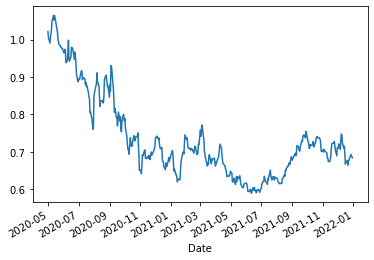

In [292]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Splitting the data into training and testing datasets

In [293]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
Date,,
2020-04-30,70.788750,67.914200
2020-05-01,72.691250,67.765099
2020-05-04,72.858749,67.608950
2020-05-05,72.778751,67.509500
2020-05-06,73.840000,67.506400


In [294]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2020-04-30 00:00:00


In [295]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2020-07-30 00:00:00


In [296]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2020-04-30,70.788750,67.914200
2020-05-01,72.691250,67.765099
2020-05-04,72.858749,67.608950
2020-05-05,72.778751,67.509500
2020-05-06,73.840000,67.506400


In [297]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2020-04-30,70.788750,67.914200
2020-05-01,72.691250,67.765099
2020-05-04,72.858749,67.608950
2020-05-05,72.778751,67.509500
2020-05-06,73.840000,67.506400


In [298]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Use the SVC classifier model to fit the training data and make predictions

In [299]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [300]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       166
         1.0       0.54      1.00      0.70       192

    accuracy                           0.54       358
   macro avg       0.27      0.50      0.35       358
weighted avg       0.29      0.54      0.37       358



C:\Users\61403\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\61403\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\61403\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Create a Dataframe of predictions

In [301]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2020-07-31,1.0,0.104689,0.104689
2020-08-03,1.0,0.025198,0.025198
2020-08-04,1.0,0.006678,0.006678
2020-08-05,1.0,0.003625,0.003625
2020-08-06,1.0,0.034889,0.034889


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-12-23,1.0,0.003644,0.003644
2021-12-27,1.0,0.022975,0.022975
2021-12-28,1.0,-0.005767,-0.005767
2021-12-29,1.0,0.000502,0.000502
2021-12-30,1.0,-0.006578,-0.006578


<AxesSubplot:xlabel='Date'>

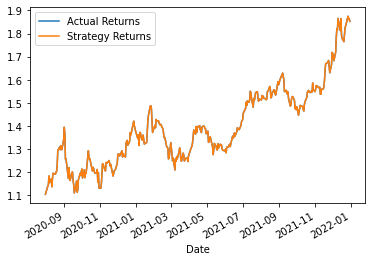

In [302]:
## Plot the actual returns versus the strategy returns
actual_vs_strategy_plot = (1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot() 
plt.savefig('svm_actual_vs_strategy.png')
actual_vs_strategy_plot

### -----------------------------------------------------

### Evaluating a New Machine Learning Classifier

In [303]:
# Import a Logistic Regression model from SKLearn
from sklearn.linear_model import LogisticRegression
# Initiate the model instance
logistic_regression_model = LogisticRegression()


### Fit another model with new classifier using original training data

In [304]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

### Backtest model to evaluate performance

In [305]:
# Create a predictions DataFrame
lr_predictions_df = pd.DataFrame(index=X_test.index)

# Add the Logistic regression model predictions to the DataFrame
lr_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
lr_predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
lr_predictions_df['Strategy Returns'] = lr_predictions_df['Actual Returns'] * lr_predictions_df['Predicted']

# Review the DataFrame
display(lr_predictions_df.head())
display(lr_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2020-07-31,1.0,0.104689,0.104689
2020-08-03,1.0,0.025198,0.025198
2020-08-04,-1.0,0.006678,-0.006678
2020-08-05,-1.0,0.003625,-0.003625
2020-08-06,-1.0,0.034889,-0.034889


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-12-23,-1.0,0.003644,-0.003644
2021-12-27,-1.0,0.022975,-0.022975
2021-12-28,-1.0,-0.005767,0.005767
2021-12-29,-1.0,0.000502,-0.000502
2021-12-30,-1.0,-0.006578,0.006578


<AxesSubplot:xlabel='Date'>

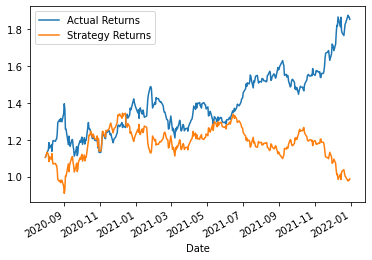

In [306]:
# Plot the actual returns versus the strategy returns
lr_actual_vs_strategy_plot = (1 + lr_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot() 
plt.savefig('lr_actual_vs_strategy.png')
lr_actual_vs_strategy_plot